<h1 style="text-align:center">Coursera Capstone</h1>

<h3>Background</h3>
<p>
Many thousands of people die in accidents every year. It is obviously a very horrible thing for both the people directly involved and their families. I want to see if weather conditions, road conditions, and light conditions at the time of a given journey can be used to predict the severity of a crash in those conditions.  Armed with the knowledge I hope to get out of the data, if someone knows that because of confounding factors they are at higher risk of being in a serius accident that day they may drive safer and with more focus, and it may save their life. The audience for this is every single motorist.


<h2> Datawrangling and Preprocessing </h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("Data-Collisions.csv")


C:\Users\Sam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


There is a duplicate SEVERITYCODE column, so that must be dropped.

In [4]:
#SEVERITYCODE.1 is a duplicate column of SEVERITYCODE
print(df['SEVERITYCODE.1'].value_counts())
print(df['SEVERITYCODE'].value_counts())
df.drop('SEVERITYCODE.1', axis = 1, inplace=True)
df.columns

1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

I think the hour of the crash could be important, so I will extract that into a feature called hour.


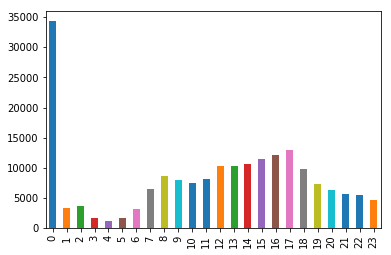

In [5]:
df['hour'] = pd.to_datetime(df['INCDTTM']).dt.hour
df.hour.value_counts().sort_index().plot(kind = 'bar', )

The 0 hour is definitely over represented in this data, so this is not a good feature for the model. There are also still many columns in our data that we can't use.  Now to remove them.

In [6]:
#dropping all irrelevent columns
dropper = ['X', 'Y', 'OBJECTID', 'INTKEY', 'LOCATION',
       'EXCEPTRSNDESC' ,'EXCEPTRSNCODE', 'INCDATE', 'SEVERITYDESC','PEDROWNOTGRNT', 
        'SDOT_COLCODE', 'SDOT_COLDESC','REPORTNO',
       'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'INCKEY','COLDETKEY','INCDTTM','hour']
df.drop(dropper, axis=1, inplace=True)
print(df.columns)

Index(['SEVERITYCODE', 'STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
       'HITPARKEDCAR'],
      dtype='object')


As there are only two options for severity index in this data set, I will change them from '1' for prop damage and '2' for injury into '0' for prop damage and '1' for injury. This will make it easier to understand later on.

In [7]:
print('BEFORE:\n',df.SEVERITYCODE.unique())
print(df['SEVERITYCODE'].value_counts())
df['SEVERITYCODE'] = [0 if x == 1 else x for x in df['SEVERITYCODE']]
df['SEVERITYCODE'] = [1 if x == 2 else x for x in df['SEVERITYCODE']]
print('\nAFTER:\n', df.SEVERITYCODE.unique())
print(df['SEVERITYCODE'].value_counts())

BEFORE:
 [2 1]
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

AFTER:
 [1 0]
0    136485
1     58188
Name: SEVERITYCODE, dtype: int64


Now to numerize underinfluence and speeding columns, and remove all rows with unmatched status. 

In [8]:
print("UNDINFL BEFORE\n", df.UNDERINFL.value_counts())
df['UNDERINFL'] = [1 if x == 'Y' else x for x in df['UNDERINFL']]
df['UNDERINFL'] = [1 if x == '1' else x for x in df['UNDERINFL']]
df['UNDERINFL'] = [0 if x == '0' else x for x in df['UNDERINFL']]
df['UNDERINFL'] = [0 if x == 'N' else x for x in df['UNDERINFL']]
print("UNDINFL AFTER\n", df.UNDERINFL.value_counts())

df = df[df.STATUS != 'Unmatched']
df.STATUS.value_counts()
df.drop("STATUS", axis = 1, inplace=True)

print('SPD BEFORE:\n',df.SPEEDING.value_counts())
df['SPEEDING'] = [1 if x == 'Y' else 0 for x in df['SPEEDING']]
print('SPD AFTER:\n',df.SPEEDING.value_counts())

df['HITPARKEDCAR'] = [1 if x == 'Y' else x for x in df['HITPARKEDCAR']]
df['HITPARKEDCAR'] = [0 if x == 'N' else x for x in df['HITPARKEDCAR']]


UNDINFL BEFORE
 N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64
UNDINFL AFTER
 0.0    180668
1.0      9121
Name: UNDERINFL, dtype: int64
SPD BEFORE:
 Y    9333
Name: SPEEDING, dtype: int64
SPD AFTER:
 0    180453
1      9333
Name: SPEEDING, dtype: int64


<h3>Dealing with Null data</h3>

In [9]:
print(df.isnull().sum())

SEVERITYCODE           0
ADDRTYPE            1817
COLLISIONTYPE         21
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6178
INATTENTIONIND    159981
UNDERINFL              0
WEATHER              197
ROADCOND             128
LIGHTCOND            286
SPEEDING               0
HITPARKEDCAR           0
dtype: int64


In this data there are quite some null entries, so now I sort that out. I will be removing all of the smaller count null values, and only leaving the INATTENTIONIND null values, as I can make a dummy variable from the 'nullness' of them. As there are no 'No' datavalues, I am hoping that could be a no feature.

In [10]:
df.dropna(subset = ['WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE','ADDRTYPE','JUNCTIONTYPE'], inplace = True)


In [11]:

df.SEVERITYCODE.value_counts()

0    126269
1     56625
Name: SEVERITYCODE, dtype: int64

<h3>Dummies</h3>

In [12]:
#add dummies for categorical variables
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x,dummy_na = True)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis = 1)
    return df

In [13]:
#define x and y for easy model usage
X = df.drop('SEVERITYCODE',1)
y = df['SEVERITYCODE']
dummylist = ['WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE','ADDRTYPE','JUNCTIONTYPE', 'INATTENTIONIND']
X = dummy_df(X, dummylist) 

In [14]:
X.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,SPEEDING,HITPARKEDCAR,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,...,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,JUNCTIONTYPE_nan,INATTENTIONIND_Y,INATTENTIONIND_nan
0,2,0,0,2,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2,0,0,2,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,4,0,0,3,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3,0,0,3,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,2,0,0,2,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


<h1>Balancing the data</h1>
Going to try 2 methods, smote upscaling and simple downscaling.


In [40]:
#import many useful modules
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
#the data is still imbalanced
y.value_counts()


0    126269
1     56625
Name: SEVERITYCODE, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

<h2>Model Testing Smote</h2>

In [49]:
#show the difference between smote and not smote data
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype(float), y_train)
print("Before smote:", Counter(y_train))
print("After smote:", Counter(y_train_smote))
model.fit(X_train_smote, y_train_smote)
print("model fitted")
y_predict_smote = model.predict(X_test)
print('Unbalanced accuracy:', accuracy_score(y_test, y_predict))
print('Balanced accuracy:', accuracy_score(y_test, y_predict_smote))

Before smote: Counter({0: 113665, 1: 50939})
After smote: Counter({0: 113665, 1: 113665})
model fitted
Unbalanced accuracy: 0.714215418261345
Balanced accuracy: 0.7077091306724986


0  model fitted
0  model predicted, accuracy:  0.6768179332968836
1  model fitted
1  model predicted, accuracy:  0.7196828868234008
2  model fitted
2  model predicted, accuracy:  0.7038819026790596
3  model fitted
3  model predicted, accuracy:  0.7206123564789503
4  model fitted
4  model predicted, accuracy:  0.7077091306724986
5  model fitted
5  model predicted, accuracy:  0.7200656096227447
6  model fitted
6  model predicted, accuracy:  0.715582285401859
7  model fitted
7  model predicted, accuracy:  0.7247129579004921
8  model fitted
8  model predicted, accuracy:  0.7171678512848552
9  model fitted
9  model predicted, accuracy:  0.7276107162383816
10  model fitted
10  model predicted, accuracy:  0.7275013668671405
11  model fitted
11  model predicted, accuracy:  0.721869874248223
12  model fitted
12  model predicted, accuracy:  0.7229633679606342
[0.67681793 0.71968289 0.7038819  0.72061236 0.70770913 0.72006561
 0.71558229 0.72471296 0.71716785 0.72761072 0.72750137 0.72186987
 0.7

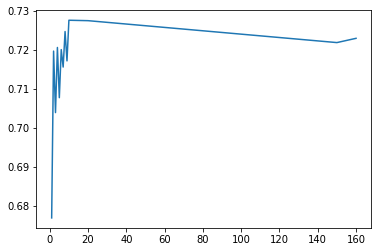

In [50]:
#finding the optimal K for knn model
ks = [1, 2, 3, 4, 5, 6, 7 , 8 ,9 , 10, 20, 150, 160]
kscores = np.zeros(len(ks))
for i in range(len(ks)):
    kmodel = KNeighborsClassifier(n_neighbors = ks[i])
    kmodel.fit(X_train_smote, y_train_smote)
    print(i, " model fitted")
    yhat = kmodel.predict(X_test)
    kscores[i] = accuracy_score(y_test, yhat)
    print(i, " model predicted, accuracy: ", kscores[i])
print(kscores)
plt.plot(ks, kscores)


In [25]:
#k = 7 works best
kmodel = KNeighborsClassifier(n_neighbors=7)
kmodel.fit(X_train_smote, y_train_smote)


KNeighborsClassifier(n_neighbors=6)

In [29]:
#deciding which is the best critera for decision tree model

dtmodel = DecisionTreeClassifier(criterion="entropy")
dtmodel.fit(X_train_smote, y_train_smote)
dtyhat = dtmodel.predict(X_test)
print("dt entropy accuracy:", accuracy_score(y_test, dtyhat))

dtmodel = DecisionTreeClassifier(criterion="gini")
dtmodel.fit(X_train_smote, y_train_smote)
dtyhat = dtmodel.predict(X_test)
print("dt gini accuracy:", accuracy_score(y_test, dtyhat))


entropy accuracy: 0.668234007654456
gini accuracy: 0.6680153089119738


In [52]:
#Entropy is the best for decision tree, and this contains deicsion trees

rf_model = RandomForestClassifier(criterion= "entropy", random_state = 42,  n_estimators = 200)
rf_model.fit(X_train_smote, y_train_smote)
rf_yhat = rf_model.predict(X_test)
accuracy_score(y_test, rf_yhat)

0.6716785128485511

<h2>Model Testing Downsampling</h2>


In [45]:
#showing the difference before and after downsampling
from imblearn.under_sampling import NearMiss 
print(X_train.shape)
print(y_train.shape)
nm = NearMiss()
X_train_res, y_train_res = nm.fit_sample(X_train, y_train)
print(X_train_res.shape)
print(y_train_res.shape)

(164604, 64)
(164604,)
(101878, 64)
(101878,)


1  model fitted
1  model predicted, accuracy:  0.6293056314926189
2  model fitted
2  model predicted, accuracy:  0.6607435757244395
3  model fitted
3  model predicted, accuracy:  0.6591580098414435
4  model fitted
4  model predicted, accuracy:  0.6806451612903226
5  model fitted
5  model predicted, accuracy:  0.6765445598687807
6  model fitted
6  model predicted, accuracy:  0.6916894477856752
7  model fitted
7  model predicted, accuracy:  0.6839803171131766
8  model fitted
8  model predicted, accuracy:  0.6997813012575178
9  model fitted
9  model predicted, accuracy:  0.6961727720065609
10  model fitted
10  model predicted, accuracy:  0.7048660470202296
20  model fitted
20  model predicted, accuracy:  0.7138326954620011
40  model fitted
40  model predicted, accuracy:  0.721869874248223
160  model fitted
160  model predicted, accuracy:  0.722252597047567
500  model fitted
500  model predicted, accuracy:  0.7221979223619465
[0.62930563 0.66074358 0.65915801 0.68064516 0.67654456 0.691689

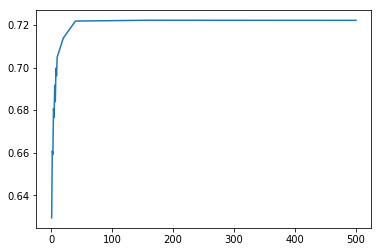

In [51]:
#doing the same models as above

ks = [1, 2, 3, 4, 5, 6, 7 , 8 ,9 , 10, 20, 40, 160, 500]
kscores = np.zeros(len(ks))
for i in range(len(ks)):
    kmodel = KNeighborsClassifier(n_neighbors = ks[i])
    kmodel.fit(X_train_res, y_train_res)
    print(ks[i], " model fitted")
    yhat = kmodel.predict(X_test)
    kscores[i] = accuracy_score(y_test, yhat)
    print(ks[i], " model predicted, accuracy: ", kscores[i])
print(kscores)
plt.plot(ks, kscores)

dtmodel = DecisionTreeClassifier(criterion="entropy")
dtmodel.fit(X_train_res, y_train_res)
dtyhat = dtmodel.predict(X_test)
print("dt entropy accuracy:", accuracy_score(y_test, dtyhat))

dtmodel = DecisionTreeClassifier(criterion="gini")
dtmodel.fit(X_train_res, y_train_res)
dtyhat = dtmodel.predict(X_test)
print("dt gini accuracy:", accuracy_score(y_test, dtyhat))

rf_model = RandomForestClassifier(criterion= "entropy", random_state = 42,  n_estimators = 200)
rf_model.fit(X_train_res, y_train_res)
rf_yhat = rf_model.predict(X_test)
print("rf entropy accuracy", accuracy_score(y_test, rf_yhat))

rf_model = RandomForestClassifier(criterion= "gini", random_state = 42,  n_estimators = 200)
rf_model.fit(X_train_res, y_train_res)
rf_yhat = rf_model.predict(X_test)
print("rf gini accuracy", accuracy_score(y_test, rf_yhat))


So the best model found is K-nearest-neighbor on the smote data, with an accuracy score of 0.7276